In [1]:
#import data manipulation libraries

import numpy as np
import pandas as pd

#import data visualization libraries

import  matplotlib.pyplot as plt
import  seaborn as sns

# import filter warnings libraries
import warnings
warnings.filterwarnings('ignore')

# import logging
import logging
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    format= '%(asctime)s %(levelname)s %(message)s',
                    filemode='w')  
#import Scikit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix                    

In [2]:
import sklearn
print(sklearn.__version__)

1.6.1


In [3]:
#importing data set using pandas function
url='https://raw.githubusercontent.com/harshthorve284/Bank-Telemarketing-ML-Model/refs/heads/main/bank.csv'
df=pd.read_csv(url,sep=';')
df.sample(frac=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4409,57,retired,married,secondary,no,107,no,no,cellular,14,jul,85,2,-1,0,unknown,no
3882,38,management,married,tertiary,no,1198,yes,no,cellular,2,feb,63,1,-1,0,unknown,no
3538,30,unemployed,single,tertiary,no,302,no,no,cellular,11,feb,528,3,-1,0,unknown,yes
2605,48,management,married,primary,no,247,yes,yes,unknown,14,may,145,1,-1,0,unknown,no
921,34,management,married,tertiary,no,136,yes,no,cellular,22,apr,156,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,27,admin.,single,tertiary,no,73,no,no,cellular,29,jan,242,1,-1,0,unknown,no
2542,30,admin.,single,secondary,no,105,yes,no,cellular,21,nov,75,1,-1,0,unknown,no
254,46,blue-collar,married,primary,no,222,no,no,cellular,8,aug,71,2,-1,0,unknown,no
1423,51,admin.,divorced,secondary,no,467,yes,no,unknown,19,may,83,1,-1,0,unknown,no


In [4]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
#descriptive satas:EDA

# step 1: Segrigate catogorical and numerical column
categorical_col=df.select_dtypes(include='object')
numerical_col=df.select_dtypes(include=['int64','float64'])

In [6]:
#step evaluate discriptive stats
from collections import OrderedDict
stats=[]
for i in numerical_col.columns:
    numerical_stats=OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Min':df[i].min(),
        'Max':df[i].max(),
        'STD':df[i].std(),
        'Skew':df[i].skew(),
        'Var':df[i].var(),
        'Kurtosis':df[i].kurtosis(),
        'Q1':df[i].quantile(0.25),
        'Q2':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25)

    })
    stats.append(numerical_stats)
    report=pd.DataFrame(stats)
report    

,Feature,Mean,Median,Min,Max,STD,Skew,Var,Kurtosis,Q1,Q2,IQR
0,age,41.170095,39.0,19,87,10.576211,0.699501,1.118562e+02,0.348775,33.0,49.0,16.0
1,balance,1422.657819,444.0,-3313,71188,3009.638142,6.596431,9.057922e+06,88.390332,69.0,1480.0,1411.0
2,day,15.915284,16.0,1,31,8.247667,0.094627,6.802402e+01,-1.039531,9.0,21.0,12.0
3,duration,263.961292,185.0,4,3025,259.856633,2.772420,6.752547e+04,12.530050,104.0,329.0,225.0
4,campaign,2.793630,2.0,1,50,3.109807,4.743914,9.670897e+00,37.168920,1.0,3.0,2.0
5,pdays,39.766645,-1.0,-1,871,100.121124,2.717071,1.002424e+04,7.957128,-1.0,-1.0,0.0
6,previous,0.542579,0.0,0,25,1.693562,5.875259,2.868153e+00,51.995212,0.0,0.0,0.0


#Whenever you evaluate the descriptive stats IQR of any column cannot be 0

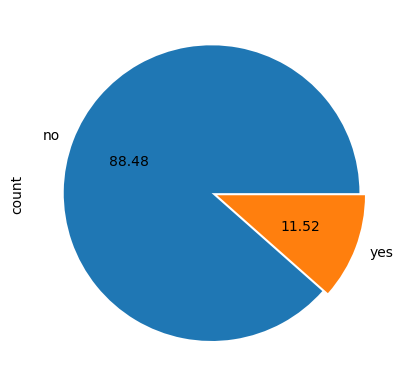

In [7]:
#Problem defination:
''' the dataset constist of 4521 row and 17 columns this dataset belongs to
portugal bank where our aim is to clssify whether the customer will subscribe the bank term deposit or not.

type of machine learning  model : Binary Classification
above dataset is a type a multivariate analysis.


X: independent columns
y: dependent columns

here ,y acts as target column / dependent column
'''
# checking  the distribution  of peope who subscribe the treams deposit

'''
based on distribution  of target column ,we found that the data is imbalanced
'''

df['y'].value_counts().plot(kind='pie',autopct='%1.2f',explode=[0.02,0.02])
plt.show()

# data insight
'''
1. 88.48% people are not subscribe the bank term deposite.
2.the avg call duration record is 284 sec .this can be one of the cause for the people who have not subscribe the bank term deposit subscription.

3.If the call duration is more than 300 sec the chances  of are there the person will subscribe the bank term deposit subscription.
4. The target  audience  is divorced people.
5.The people who taken the are excluded from bank term deposit.

'''

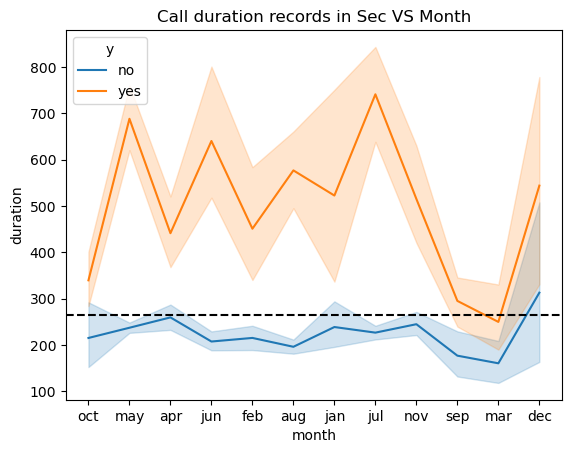

In [8]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['y'])
plt.title('Call duration records in Sec VS Month')
plt.axhline(df['duration'].mean(),linestyle='--',c='black')

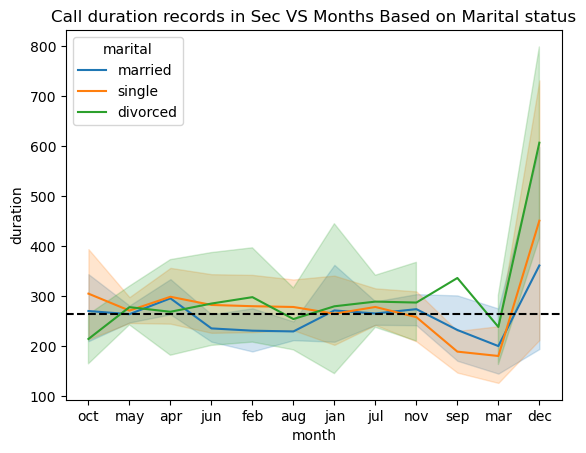

In [9]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['marital'])
plt.title('Call duration records in Sec VS Months Based on Marital status')
plt.axhline(df['duration'].mean(),linestyle='--',c='black')
plt.show()

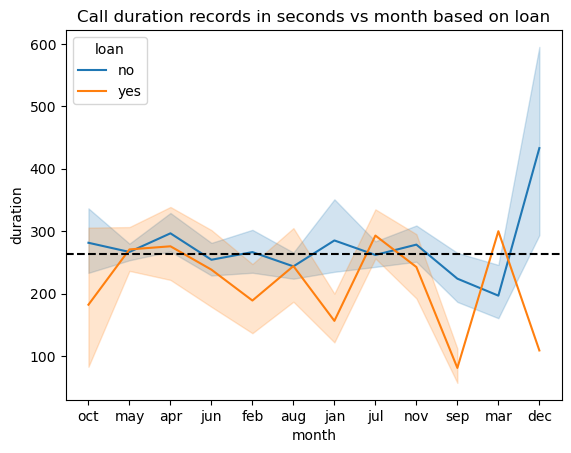

In [10]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['loan'])
plt.title('Call duration records in seconds vs month based on loan')
plt.axhline(df['duration'].mean(),linestyle='--',c='black')
plt.show()

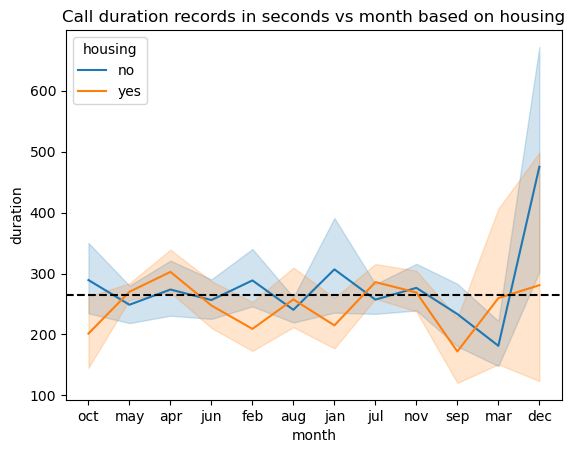

In [11]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['housing'])
plt.title('Call duration records in seconds vs month based on housing')
plt.axhline(df['duration'].mean(),linestyle='--',c='black')
plt.show()

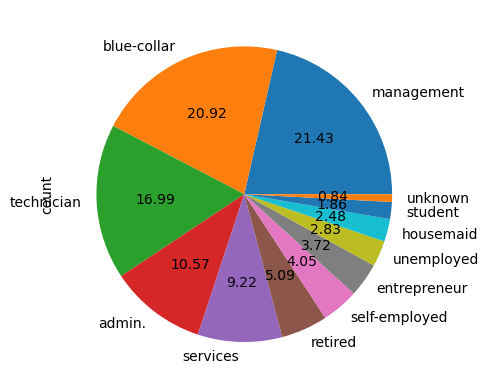

In [12]:
df['job'].value_counts().plot(kind='pie',autopct='%1.2f')
plt.show()

In [13]:
management=df[df['job']=='management']
technician =df[df['job']=='technician']
bluecollar=df[df['job']=='blue-collar']
admin =df[df['job']=='admin.']

<Axes: ylabel='count'>

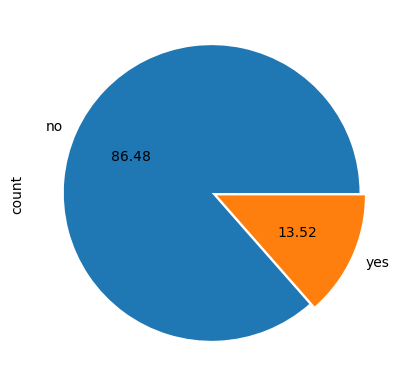

In [14]:
management['y'].value_counts().plot(kind='pie',autopct='%1.2f',explode=[0.02,0.02])

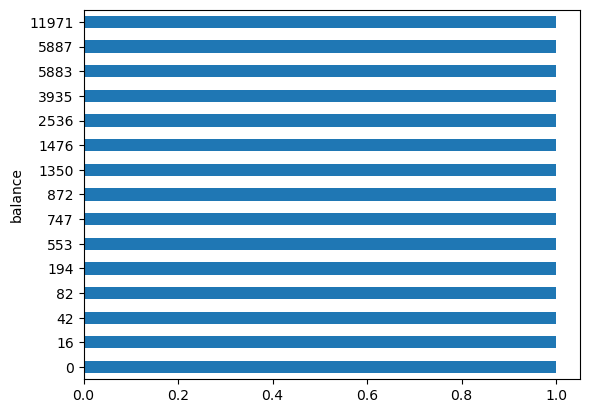

In [15]:

management['balance'][0:15].sort_values(ascending=True).value_counts().plot (kind='barh')

plt.show()

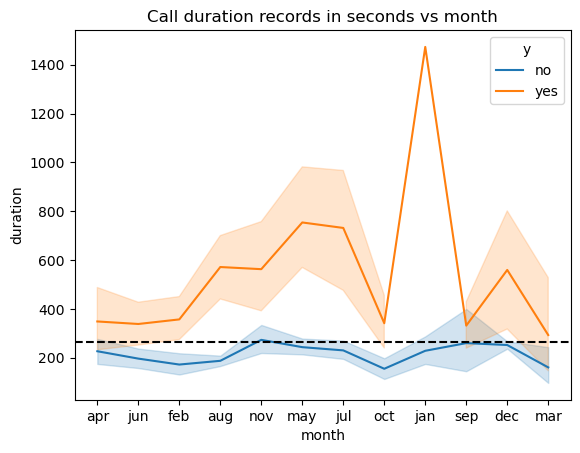

In [16]:
sns.lineplot(x=management['month'],y=management['duration'],hue=management['y'])
plt.title('Call duration records in seconds vs month')
plt.axhline(264,linestyle='--',c='black')
plt.show()

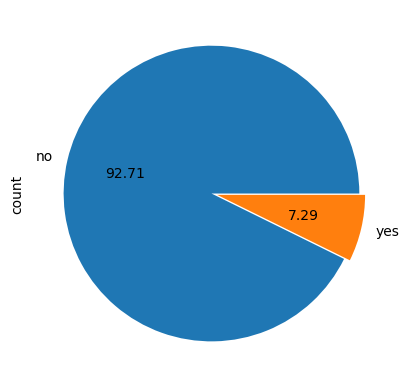

In [17]:

bluecollar['y'].value_counts().plot (kind='pie',autopct='%1.2f',explode=[0.02,0.02])
plt.show()

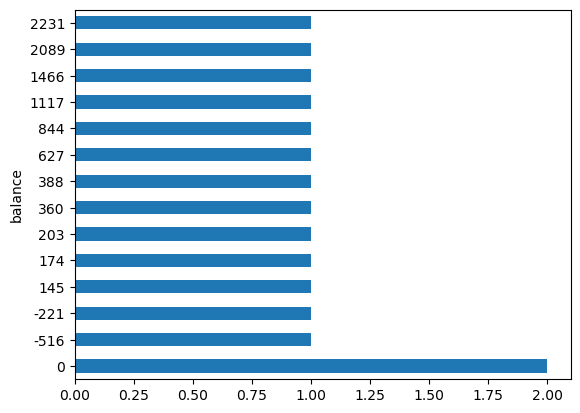

In [18]:
bluecollar['balance'][0:15].sort_values(ascending=True).value_counts().plot (kind='barh')

plt.show()

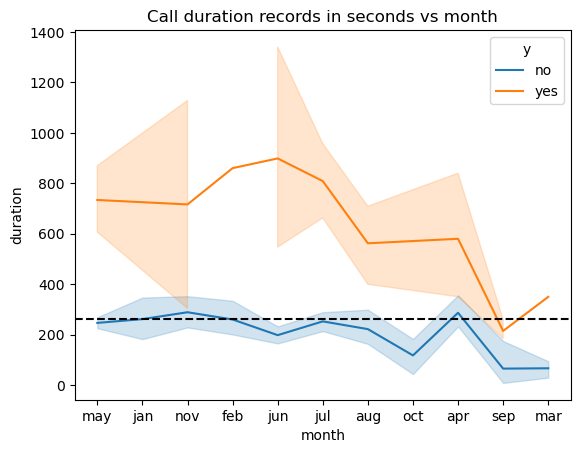

In [19]:
sns.lineplot(x=bluecollar['month'],y=bluecollar['duration'],hue=bluecollar['y'])
plt.title('Call duration records in seconds vs month')
plt.axhline(264,linestyle='--',c='black')
plt.show()

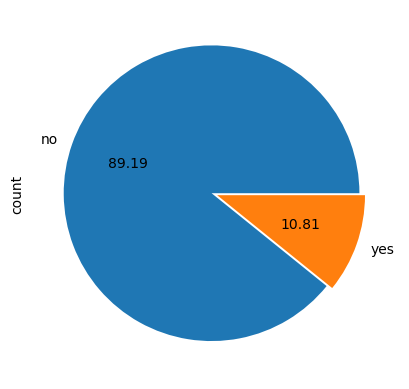

In [20]:
technician['y'].value_counts().plot (kind='pie',autopct='%1.2f',explode=[0.02,0.02])
plt.show()


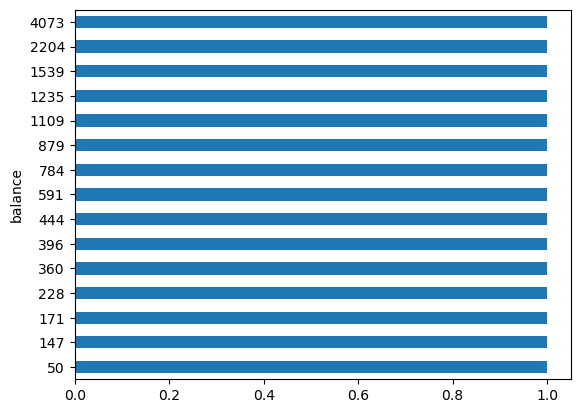

In [21]:
technician['balance'][0:15].sort_values(ascending=True).value_counts().plot (kind='barh')

plt.show()

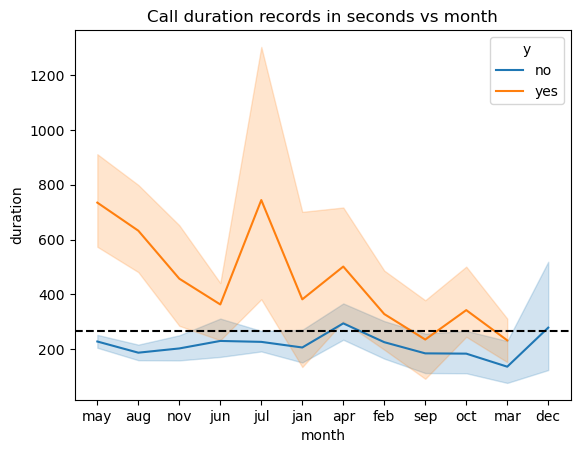

In [22]:
sns.lineplot(x=technician['month'],y=technician['duration'],hue=technician['y'])
plt.title('Call duration records in seconds vs month')
plt.axhline(264,linestyle='--',c='black')
plt.show()

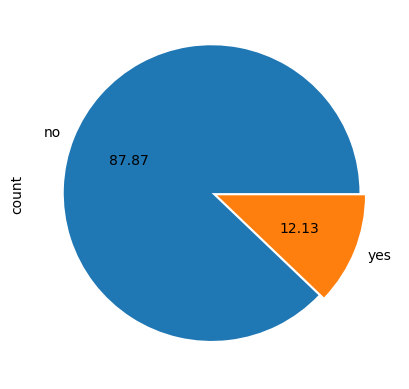

In [23]:
admin['y'].value_counts().plot(kind='pie',autopct='%1.2f',explode=[0.02,0.02])
plt.show()

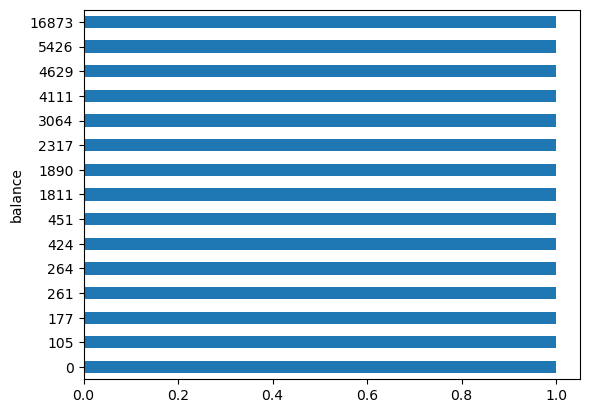

In [24]:
admin['balance'][0:15].sort_values(ascending=True).value_counts().plot (kind='barh')

plt.show()

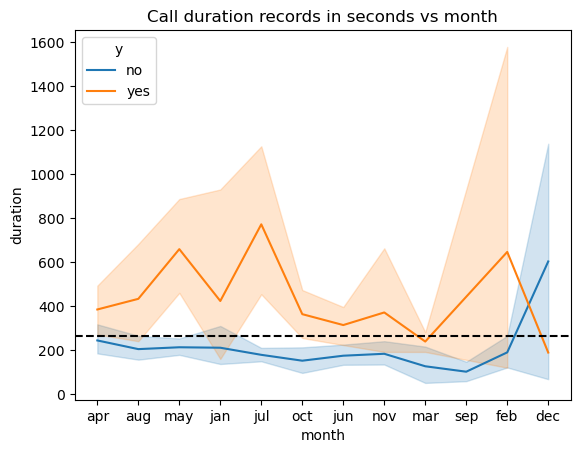

In [25]:
sns.lineplot(x=admin['month'],y=admin['duration'],hue=admin['y'])
plt.title('Call duration records in seconds vs month')
plt.axhline(264,linestyle='--',c='black')
plt.show()

In [26]:
'''
1. pdays  and previous these two columns shows IQR =0 ,hence we need to drop
these 2 column s from the dataset
'''
#create a copy of df
data=df.copy()
data.sample(frac=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
836,55,housemaid,married,primary,no,16,no,no,unknown,20,jun,64,1,-1,0,unknown,no
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1936,37,management,single,tertiary,no,695,no,no,cellular,28,jan,233,1,-1,0,unknown,no
1201,40,technician,married,secondary,no,1270,no,no,cellular,17,apr,342,2,-1,0,unknown,no
271,24,blue-collar,single,secondary,no,174,yes,yes,cellular,18,may,487,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,38,technician,single,tertiary,no,25,yes,no,cellular,1,jun,232,2,-1,0,unknown,yes
3440,32,services,married,secondary,no,4885,yes,yes,cellular,18,nov,400,2,-1,0,unknown,no
2540,31,management,married,tertiary,no,4148,yes,no,cellular,21,nov,316,3,99,9,other,yes
1908,44,technician,single,secondary,no,-27,yes,yes,unknown,14,may,100,3,-1,0,unknown,no


In [27]:
# encoding using this get_dumies method
'''
obervatuon :
the no of columns are increased ,which impact badly w.r.t model bulding
'''
data=pd.get_dummies(data,drop_first=True,dtype='int')

In [28]:
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
# endoding technique :LabelEncoding
'''
1. independent columns can be coded directly  using labelencoder
2. target column must be decoded seprately either by using replace fuction or map function
'''
preprocess_data=df.copy()
preprocess_data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['default']=le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['contact']=le.fit_transform(df['contact'])
df['month']=le.fit_transform(df['month'])
df['poutcome']=le.fit_transform(df['poutcome'])

#transform target column to numerical
df['y']=df['y'].replace({'yes':1,'no':0})


In [30]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [31]:
# concept of data leakage
'''
Step 1: split the data set into X and y
      X: independent  column
      y: target column

step 2:split the data into train and test
        train: seen
        test: unseen

step 3:Try balancing the target column in caase of Classification problem
       Imbalance Technique: 1.Oversampling 2.Undersampling

step 4:Scaling techniques
       1.MinMaxScaler
       2.RobustScaler
       3.StandardScaler

step 5: Modeling building


'''


#step 1: Split the dataset into X and y
X=df.drop (columns= ['pdays','previous','y'],axis=1)
y=df['y']

#step 2 : split the dataset into train and test
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

# step 3: Balancing the target column
#OVERSAMPLING
from  imblearn.over_sampling import SMOTE,ADASYN,SMOTEN
from  imblearn.under_sampling import ClusterCentroids
sm= SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train_res.value_counts()






NameError: name 'y_train_res' is not defined

In [ ]:

# step 4: caling Technqiues
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print('The Model Accuracy for the Decesion Tree Classifier: ',accuracy_score(y_test,y_pred_DT))


The Model Accuracy for the Decesion Tree Classifier:  0.8415622697126013


(5590,)
